In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [20]:
data.occupation.value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

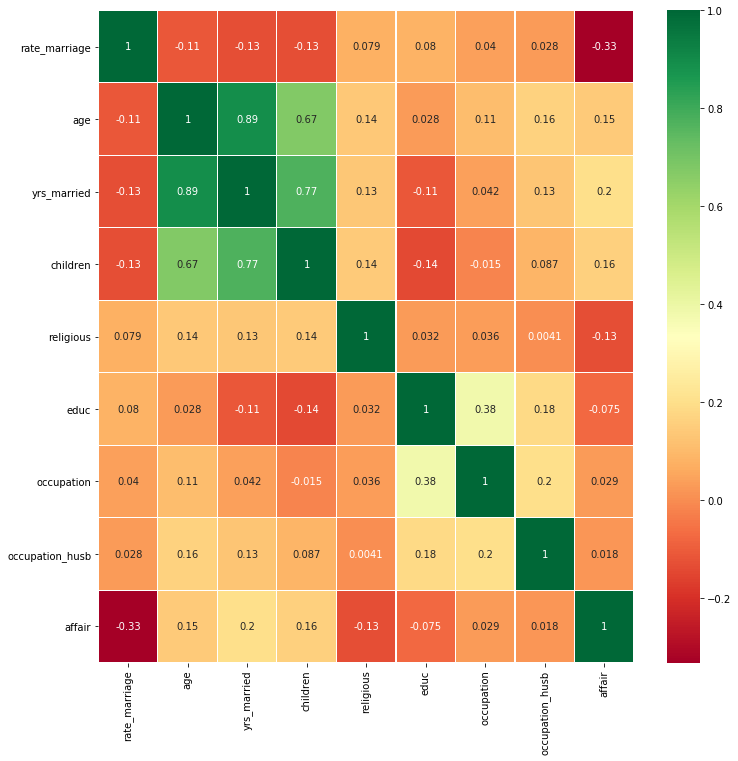

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Наблюдаем весомую корреляцию между признаками age, yrs_married, children, что логично )  
Оставим yrs_married.

In [22]:
data_new = data[ ['rate_marriage', 'yrs_married', 'religious', 'educ', 'occupation', 'occupation_husb', 'affair']] 

In [23]:
data_new.head()

,rate_marriage,yrs_married,religious,educ,occupation,occupation_husb,affair
0,3.0,9.0,3.0,17.0,2.0,5.0,1
1,3.0,13.0,1.0,14.0,3.0,4.0,1
2,4.0,2.5,1.0,16.0,3.0,5.0,1
3,4.0,16.5,3.0,16.0,5.0,5.0,1
4,5.0,9.0,1.0,14.0,3.0,4.0,1


In [24]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [26]:
X = data_new[data_new.columns[:-1]]
X.head(2)

,rate_marriage,yrs_married,religious,educ,occupation,occupation_husb
0,3.0,9.0,3.0,17.0,2.0,5.0
1,3.0,13.0,1.0,14.0,3.0,4.0


In [27]:
y = data_new['affair']

In [28]:
model = LogisticRegression()

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [32]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model.score(X_test, Y_test)

0.7293193717277487

In [34]:
model.score(X_train, Y_train)

0.7190305206463196

In [149]:
from sklearn.metrics import roc_curve
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds)

In [150]:
threshold = 0
TPR = []
FPR = []
count = list(Y_test.value_counts().items())
if count[0][0] == 0:
    N = count[0][1]
    P = count[1][1]
else:
    N = count[1][1]
    P = count[0][1]

while threshold <= 1:
    TP = 0
    FP = 0
    for predicted_prob, actual in zip( preds, Y_test ):
        if predicted_prob >= threshold:
            if actual == 1:
                TP += 1
            else:
                FP += 1
    TPR.append(TP / P)  
    FPR.append(FP / N) 
    threshold += 0.01 # Выбрал данный шаг, чтобы было видно отличие на графиках

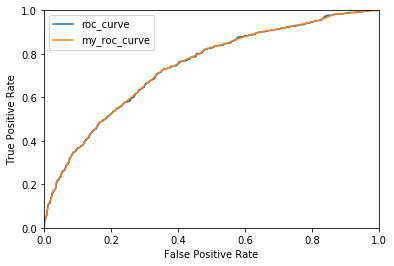

In [151]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = 'roc_curve')
plt.plot(FPR, TPR, label = 'my_roc_curve')
plt.legend( loc = 0 )
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()